In [1]:
import os 
import numpy as np 
import xarray as xr
import pandas as pd
import scipy.linalg as LA
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate


from matplotlib import animation, rc
plt.rcParams['text.usetex'] = True
plt.rcParams['animation.html'] = 'jshtml'

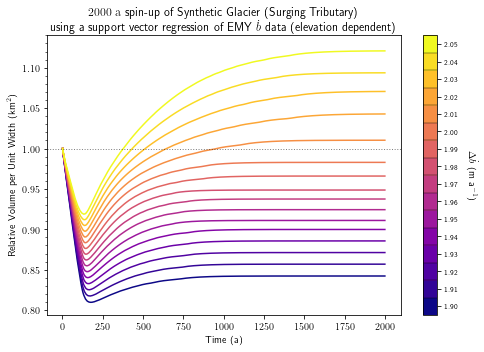

In [3]:
fp      = '../Synthetic/farinotti_corrected/dx50/exp_01_elevation_dependent/hdf5/'
files   = sorted([os.path.join(fp,file) for file in os.listdir(fp) if file.endswith('.nc') and '2000a' in file and 'dt_1'])
xarrays = []

for file in files:
    xarrays.append(xr.open_dataset(file))
    
mf_dataset = xr.concat(xarrays, 
                       pd.Index(data = np.arange(1.90, 2.051, 0.01), name='Delta_MB'))

mf_dataset['z_s'] = mf_dataset.z_s.where((mf_dataset.z_s - mf_dataset.z_b) != 10., mf_dataset.z_b)
mf_dataset["H"]   = mf_dataset.z_s - mf_dataset.z_b

Vol = mf_dataset.H.integrate("x") / mf_dataset.H.isel(t=1).integrate("x")

import matplotlib.colors as mcolors
import matplotlib.cm as cm

############################################################
# For Seting up the colorbar: 
#    - http://csc.ucdavis.edu/~jmahoney/matplotlib-tips.html
############################################################

colormap = cm.plasma
normalize = mcolors.Normalize(vmin=np.min(mf_dataset.Delta_MB), vmax=np.max(mf_dataset.Delta_MB))

# Colorbar setup
s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
s_map.set_array(mf_dataset.Delta_MB)

# If color parameters is a linspace, we can set boundaries in this way
halfdist = (mf_dataset.Delta_MB[1] - mf_dataset.Delta_MB[0])/2.0
boundaries = np.linspace(mf_dataset.Delta_MB[0] - halfdist, 
                         mf_dataset.Delta_MB[-1] + halfdist, 
                         len(mf_dataset.Delta_MB) + 1)

fig, ax = plt.subplots(figsize=(7, 5))

for delta_mb in Vol.Delta_MB:
    color = colormap(normalize(delta_mb))
    
    ax.plot(Vol.t[1:], Vol.sel(Delta_MB=delta_mb)[1:], color=color)

ax.axhline(1.0,c='k',ls=':',lw=1, alpha=0.5)

cbar = fig.colorbar(s_map, 
                    spacing='proportional', 
                    ticks=mf_dataset.Delta_MB, 
                    ax=ax, 
                    boundaries=boundaries, 
                    drawedges=True, 
                    format='%2.2f')

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0.8, 1.1, 0.05)
minor_ticks = np.arange(0.8, 1.15, 0.01)

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# # Or if you want different settings for the grids:
# ax.grid(which='minor', alpha=0.5, axis='both')
# ax.grid(which='major', alpha=0.9, axis='both')


ax.set_title(r'\begin{center} $2000 \; \rm{a}$ spin-up of Synthetic Glacier (Surging Tributary) \\ using a support vector regression of EMY $\dot b$ data (elevation dependent) \end{center}',pad = 20.0)
ax.set_ylabel('Relative Volume per Unit Width (km$^2$)')
ax.set_xlabel('Time (a)')
    
cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=7) 

fig.tight_layout()
#fig.savefig('../plots/farinotti_corrected/dx50/Vol_1.9--2.5_dx_100.png', dpi=400, bbox_inches='tight', facecolor='w')

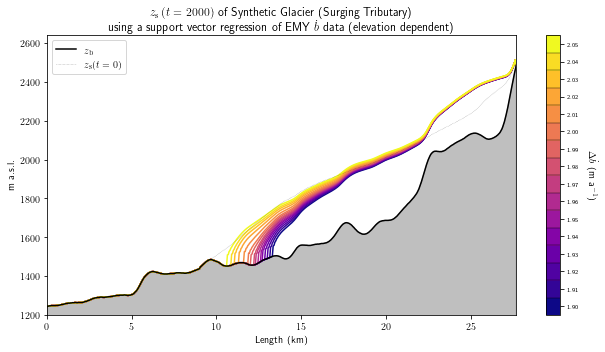

In [12]:
fig, ax = plt.subplots(figsize=(9, 5))

for delta_mb in Vol.Delta_MB:
    color = colormap(normalize(delta_mb))
    ax.plot(mf_dataset.x/1000., mf_dataset.isel(t=-1).z_s.sel(Delta_MB=delta_mb), color=color)
    
ax.plot(mf_dataset.x/1000., mf_dataset.isel(t=0,Delta_MB=0).z_b, color='k', label=r'$z_{\rm b}$')
ax.plot(mf_dataset.x/1000., mf_dataset.isel(t=1,Delta_MB=0).z_s, 
        color='k', ls=':', lw=0.5, alpha = 0.5, label=r'$z_{\rm s}(t=0)$')

ax.fill_between(mf_dataset.x/1000., mf_dataset.isel(t=0,Delta_MB=0).z_b, color='gray', alpha=0.5)


cbar = fig.colorbar(s_map, 
                    spacing='proportional', 
                    ticks=mf_dataset.Delta_MB, 
                    ax=ax, 
                    boundaries=boundaries, 
                    drawedges=True, 
                    format='%2.2f')

ax.set_title(r'\begin{center} $z_{\rm s} \left( t=2000 \right)$ of Synthetic Glacier (Surging Tributary) \\ using a support vector regression of EMY $\dot b$ data (elevation dependent) \end{center}', pad = 20.0)

ax.legend(loc=2)

ax.set_xlabel('Length (km)')
ax.set_ylabel('m a.s.l.')
ax.set_xlim(0,np.max(mf_dataset.x)/1000.)
ax.set_ylim(1200, None)

cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=6) 


#ax.axvline(Data.x[idx]/1000.,)


#ax.set_xlim(10, None)
fig.tight_layout()
fig.savefig('../plots/farinotti_corrected/dx50/Final_Z_s_1.9--2.5_dx_100.png', dpi=400, bbox_inches='tight', facecolor='w')

In [ ]:
Data = mf_dataset.isel(Delta_MB=10)

In [ ]:
Data.H.max()

In [ ]:
fig, ax = plt.subplots(1,1)

for delta_mb in Vol.Delta_MB:
    color = colormap(normalize(delta_mb))
    ax.plot(Vol.t[1:], 
            np.abs(Vol.sel(Delta_MB=delta_mb)[1:].differentiate('t')), color=color)
    
cbar = fig.colorbar(s_map, 
                    spacing='proportional', 
                    ticks=mf_dataset.Delta_MB, 
                    ax=ax, 
                    boundaries=boundaries, 
                    drawedges=True, 
                    format='%2.2f')


cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=6) 


ax.axhline(1e-6, ls=':', c='k', alpha=0.5)
ax.set_yscale('log')


ax.set_ylabel(r'$\left| \frac{\partial V}{\partial t} \right|$', fontsize='xx-large')
ax.set_xlabel('Time (a)')
ax.set_title (r'$\left| \frac{\partial V}{\partial t} \right|$ for $2000 \; \rm{a}$ spin-up of Synthetic Glacier (Surging Tributary)')

fig.savefig('../plots/farinotti_corrected/dVdt_1.9--2.0_dx_100.png', dpi=400, bbox_inches='tight', facecolor='w')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6.6667,4))

ax.set_xlim(Data.x.min(), Data.x.max())
ax.set_ylim(Data.z_s.min()-25, Data.z_s.max()+200)
ax.set_ylabel('m a.s.l.')
ax.set_xlabel('x-coord (m)')

ax.plot( Data.x, Data.isel(t=1).z_b,color='saddlebrown')
ax.fill_between(Data.x, np.ones(Data.x.shape[0])*ax.get_ylim()[0], Data.isel(t=0).z_b, color='saddlebrown', alpha=0.5)

collection = ax.fill_between(Data.x, Data.isel(t=1).z_b, Data.isel(t=1).z_s, color='lightblue', alpha=0.5)

ax.plot(Data.x, Data.isel(t=1).z_s, 'k:', alpha=0.5, label='$z_s(t=0.0)$')
ax.legend(loc=2)


ax.set_title('$z_{{ \\rm s}} \\left( t=2000 \\right)$ of Synthetic Glacier (Surging Tributary) with $\\Delta \\dot{{b}} ={{{}}} \\; \\rm{{ m a^{{-1}}}}$ '.format(Data.Delta_MB.values))
ax.set_aspect(9)

line1, = ax.plot([], [], lw=2, color='lightblue', label='$z_s(t=0.0)$',)
line   = [line1]

def animate(i):
    if i == 0:
        ax.collections.clear()
        line[0].set_data(Data.x, Data.isel(t=i).z_s)
        line[0].set_label('$z_s(t={{{:.1f}}})$'.format(i/10))

        ax.fill_between(Data.x, np.ones(Data.x.shape[0])*ax.get_ylim()[0], Data.isel(t=1).z_b, color='saddlebrown', alpha=0.5)
        ax.fill_between(Data.x, Data.isel(t=1).z_b, Data.isel(t=0).z_s, color='lightblue', alpha=0.5)
        ax.legend(loc=2)

    else:
        ax.collections.clear()
        line[0].set_label('$z_s(t={{{:.1f}}})$'.format(i))
        line[0].set_data(Data.x,  Data.isel(t=i).z_s)
        ax.fill_between(Data.x, np.ones(Data.x.shape[0])*ax.get_ylim()[0], Data.isel(t=i).z_b, color='saddlebrown', alpha=0.5)
        ax.fill_between(Data.x, Data.isel(t=i).z_b, Data.isel(t=i).z_s, color='lightblue', alpha=0.5)
    
        ax.legend(loc=2)


    return line



times    = np.arange(0, Data.t.shape[0], 10)
times[0] = 1.

anim = animation.FuncAnimation(fig, animate, 
                               frames=times, interval=150, blit=True)

plt.tight_layout()
plt.close()
anim

In [ ]:
anim.save('../plots/farinotti_corrected/DeltaMB=2.0_2000a_animation.mp4', fps=10, dpi=800)

In [ ]:
fp      = '../Synthetic/Farinotti_smooth/Exp_01_elevation_dependent/hdf5/'
files   = sorted([os.path.join(fp,file) for file in os.listdir(fp) if file.endswith('.nc') and '2000a' in file and 'dt_1'])
xarrays = []

for file in files:
    xarrays.append(xr.open_dataset(file))
    
mf_dataset = xr.concat(xarrays, 
                       pd.Index(data = np.arange(2.0, 2.51, 0.01), name='Delta_MB'))

mf_dataset["H"] = mf_dataset.z_s - mf_dataset.z_b

In [ ]:
np.arange(2.0, 2.51, 0.01)

In [ ]:
test = xr.open_dataset(files[41])
test["H"] = test.z_s - test.z_b

In [ ]:
# xr.open_mfdataset('../Synthetic/Exp_01_elevation_dependent/hdf5/*.nc',
#                   concat_dim=pd.Index(data = np.arange(2.0, 2.51, 0.01),  name='Delta_MB'), 
#                   coords='all')

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

############################################################
# For Seting up the colorbar: 
#    - http://csc.ucdavis.edu/~jmahoney/matplotlib-tips.html
############################################################

colormap = cm.plasma
normalize = mcolors.Normalize(vmin=np.min(mf_dataset.Delta_MB), vmax=np.max(mf_dataset.Delta_MB))

# Colorbar setup
s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
s_map.set_array(mf_dataset.Delta_MB)

# If color parameters is a linspace, we can set boundaries in this way
halfdist = (mf_dataset.Delta_MB[1] - mf_dataset.Delta_MB[0])/2.0
boundaries = np.linspace(mf_dataset.Delta_MB[0] - halfdist, 
                         mf_dataset.Delta_MB[-1] + halfdist, 
                         len(mf_dataset.Delta_MB) + 1)

In [ ]:
Vol = mf_dataset.H.integrate("x") / mf_dataset.H.sel(t=0).integrate("x")

In [ ]:
plt.plot(Vol.Delta_MB, Vol.sel(t=2000), 'x')
plt.plot(Vol.isel(Delta_MB=41).Delta_MB, Vol.isel(Delta_MB=41).sel(t=2000), 'o')
plt.plot(Vol.isel(Delta_MB=40).Delta_MB, Vol.isel(Delta_MB=40).sel(t=2000), 'o')

plt.axhline(1.0, ls='--', c='k', lw=0.5)

In [ ]:
Vol.isel(Delta_MB=40).Delta_MB

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

for delta_mb in Vol.Delta_MB:
    color = colormap(normalize(delta_mb))
    
    ax.plot(Vol.t, Vol.sel(Delta_MB=delta_mb), color=color)

ax.axhline(1.0,c='k',ls=':',lw=1, alpha=0.5)

cbar = fig.colorbar(s_map, 
                    spacing='proportional', 
                    ticks=mf_dataset.Delta_MB, 
                    ax=ax, 
                    boundaries=boundaries, 
                    drawedges=True, 
                    format='%2.2f')

ax.set_title(r'\begin{center} $2000 \; \rm{a}$ spin-up of Synthetic Glacier (Surging Tributary) \\ using a support vector regression of EMY $\dot b$ data (elevation dependent) \end{center}',pad = 20.0)
ax.set_ylabel('Relative Volume per Unit Width (km$^2$)')
ax.set_xlabel('Time (a)')
    
cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=7) 

fig.tight_layout()
fig.savefig('../plots/denser_Vol_versus_time_dt1a.png', dpi=400, bbox_inches='tight', facecolor='w')

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))

for delta_mb in Vol.Delta_MB:
    color = colormap(normalize(delta_mb))
    ax.plot(mf_dataset.x/1000., mf_dataset.isel(t=-1).z_s.sel(Delta_MB=delta_mb), color=color)
    
ax.plot(test.x/1000., test.isel(t=-1).z_s, color = colormap(normalize(2.41)))
ax.plot(mf_dataset.x/1000., mf_dataset.isel(t=0,Delta_MB=0).z_b, color='k', label=r'$z_{\rm b}$')
ax.plot(mf_dataset.x/1000., mf_dataset.isel(t=0,Delta_MB=0).z_s, 
        color='k', ls=':', lw=0.5, alpha = 0.5, label=r'$z_{\rm s}(t=0)$')

ax.fill_between(mf_dataset.x/1000., mf_dataset.isel(t=0,Delta_MB=0).z_b, color='gray', alpha=0.5)


cbar = fig.colorbar(s_map, 
                    spacing='proportional', 
                    ticks=mf_dataset.Delta_MB, 
                    ax=ax, 
                    boundaries=boundaries, 
                    drawedges=True, 
                    format='%2.2f')

ax.set_title(r'\begin{center} $z_{\rm s} \left( t=2000 \right)$ of Synthetic Glacier (Surging Tributary) \\ using a support vector regression of EMY $\dot b$ data (elevation dependent) \end{center}',pad = 20.0)

ax.legend(loc=2)

ax.set_xlabel('Length (km)')
ax.set_ylabel('m a.s.l.')
ax.set_xlim(0,np.max(mf_dataset.x)/1000.)
ax.set_ylim(1200, None)

cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=6) 

fig.tight_layout()
fig.savefig('../plots/denser_final_Z_s.png', dpi=400, bbox_inches='tight', facecolor='w')

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))

for delta_mb in Vol.Delta_MB:
    color = colormap(normalize(delta_mb))
    
    ax.plot(Vol.t, mf_dataset.b_dot.integrate("x").sel(Delta_MB=delta_mb), color=color)
    


In [ ]:
plt.plot((mf_dataset.isel(Delta_MB=0).b_dot * mf_dataset.isel(Delta_MB=0).H).integrate("x"))
#plt.yscale('log')

In [ ]:
(mf_dataset.isel(Delta_MB=41).b_dot*2*Vol.isel(Delta_MB=41)).integrate("x")

In [ ]:
np.sum(mf_dataset.isel(Delta_MB=0,t=-1).b_dot)

In [ ]:
Vol.isel(Delta_MB=0, t=-1)

In [ ]:
#mf_dataset.isel(Delta_MB=41).H.plot.pcolormesh

In [ ]:
#mf_dataset.isel(Delta_MB=41).H.plot.pcolormesh

In [ ]:
#! cat ../Synthetic/Exp_01_elevation_dependent/SaveData/lk_pre_1002a_mb_0.0_off.dat.names 

In [ ]:
####################################################################################
# load inital conidtions used in model run 
####################################################################################
#x_c = np.loadtxt('../Synthetic/Exp_01_elevation_dependent/SaveData/lk_pre_500a_mb_2.50_off.dat') # x-coordinate
z_s = np.loadtxt('../Data/Topography/REF_SurfTopo.dat')    # surface elevation (m a.s.l.)
z_b = np.loadtxt('../Data/Topography/REF_BedTopo.dat')[:,1]     # bed evelation (m a.s.l.)

# # flip all axes so x-coord is descending not ascending
# x_c = x_c[::-1]
# x_c = x_c.reshape(-1,143,12)
z_s = z_s[::-1]
# z_b = z_b[::-1] 

#####################################################################################
# interpolate inital conditions and evaluate a Elmer Grid cell locations
#####################################################################################
f   = interpolate.interp1d(z_s[1], z_s[0])

In [ ]:
dats = [fn for fn in os.listdir('../Synthetic/Exp_01_elevation_dependent/SaveData/') if fn.endswith('.dat') and '1002a' in fn]
# Sort the list based on MB offset
#dats.sort(key=lambda i: float(i.split('_')[-3]))
dats.sort(key=lambda i: float('.'.join(i.split('_')[-2].split('.'))))
#dats.sort(key=lambda i: float(i.split('_')[-2]))

MB_PRE = []
for i, dat in enumerate(dats): 
    dat = np.loadtxt('../Synthetic/Exp_01_elevation_dependent/SaveData/{}'.format(dat))
    dat = dat.reshape(-1,143,12)
    #dat[:,:,7][dat[:,:,7] < dat[:,:,8]+10] = dat[:,:,8][dat[:,:,7] < dat[:,:,8]+10]
    
    MB_PRE.append(dat)

    
del_bd = np.linspace(0,2.5,len(MB_PRE))

In [ ]:
del_bd

Set up the color bar!!

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

############################################################
# For Seting up the colorbar: 
#    - http://csc.ucdavis.edu/~jmahoney/matplotlib-tips.html
############################################################

colormap = cm.plasma
normalize = mcolors.Normalize(vmin=np.min(del_bd), vmax=np.max(del_bd))

# Colorbar setup
s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
s_map.set_array(del_bd)

# If color parameters is a linspace, we can set boundaries in this way
halfdist = (del_bd[1] - del_bd[0])/2.0
boundaries = np.linspace(del_bd[0] - halfdist, del_bd[-1] + halfdist, len(del_bd) + 1)

# Convergence Figures

In [ ]:
PuBu   = plt.cm.viridis(np.linspace(0,1,len(del_bd)))
plasma = plt.cm.plasma(np.linspace(0,1,len(del_bd)))

In [ ]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(6.0,6.0))

for i in range(len(MB_PRE)):
    dat = MB_PRE[i]
    ax[0].plot((dat[1:,0,0]+4)*2, 
               LA.norm(dat[1:,:,7] - dat[:-1,:,7],axis=1,ord=2),
               color=plasma[i],
               label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]))
    
    ax[0].set_ylabel(r'$||H^{t+1} - H^{t}||_2$')
    ax[0].set_yscale('log')
    #ax[0].grid( which='both')
    
    ax[1].plot((dat[1:,0,0]+4)*2, 
               np.sqrt(((dat[1:,:,7] - dat[:-1,:,7])**2).mean(axis=1)) / np.mean(dat[1:,:,7], axis=1),
               color=plasma[i],
               label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]))
    
    ax[1].set_ylabel('RMSD of: $H^{t+1} - H^{t}$')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('Time (a)')

    #ax[1].grid( which='both')

#ax[0].legend(title='(m a$^{-1}$)',fontsize='small');

fig.tight_layout()
#fig.savefig('../plots/LK_PRE_MB_converge_svr.png',dpi=300,bbox_inches='tight',facecolor="w")

In [ ]:
fig, ax = plt.subplots(1,1,sharex=True,figsize=(8.0,4.0))

for i in range(len(MB_PRE)):
    dat = MB_PRE[i]
    
    ax.plot((dat[1:,0,0]+4)*2, 
               np.sqrt(((dat[1:,:,7] - dat[:-1,:,7])**2).mean(axis=1)) / np.mean(dat[1:,:,7], axis=1),
               color=plasma[i],
               label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]))
    
    ax.set_ylabel('NRMSD of Surface Elevation ($S$)')
    ax.set_yscale('log')
    ax.grid(True, which='both')
    
    ax.set_title(r'NRMSD = $\frac{1}{\bar S^{t-1} }\sqrt{\frac{\sum_k^N (S_k^t - S_k^{t-1})^2 }{N}}$')
    ax.set_xlabel('Time (a)')
    
#ax[0].legend(title='(m a$^{-1}$)',fontsize='small');
cbar = fig.colorbar(s_map, spacing='proportional', ticks=del_bd, ax=ax, boundaries=boundaries, drawedges=True, format='%2.2g') 
cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)

fig.tight_layout()
fig.savefig('../plots/NRMSD_converge.png', dpi = 600, bbox_inches='tight', facecolor='w')

In [ ]:
# plt.plot((np.mean(H[1:,:] - H[:-1,:], axis=1) / np.mean(H[:-1,:], axis=1))[5:])
# plt.yscale('log')

In [ ]:
#f(dat[0,:,4])

In [ ]:
#dat[0,:,4]

# Length and Area timeseries

In [ ]:
plasma = plt.cm.plasma(np.linspace(0,1,len(del_bd)))

In [ ]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(6.0,6.0))

for i in range(len(MB_PRE)):
    dat = MB_PRE[i]
    L = np.count_nonzero((dat[:,:,7 ] - dat[:,:,8]) > 10.,axis=1)*206/1000.0
    ax[0].plot((dat[:,0,0]+4)*2, L,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[0].set_ylabel('Length (km)')

    integrated = np.trapz((dat[:,:,7] - dat[:,:,8])/1000.0, axis = 1)
    ax[1].plot((dat[:,0,0]+4)*2,integrated,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[1].set_ylabel('Volume per Unit Width (km$^2$)')
    ax[1].set_xlabel('Time (a)')
    
    
ax[0].axhline( np.count_nonzero((dat[0,:,7 ] - dat[0,:,8]) > 10.)*206/1000.0, linestyle=':',color='k',alpha=0.75,lw=1.0)
ax[1].axhline(np.trapz((dat[0,:,7] - dat[0,:,8])/1000.0), linestyle=':',color='k',alpha=0.75,lw=1.0)

#ax[0].legend(title='(m a$^{-1}$)',fontsize='small');

fig.tight_layout()
#fig.savefig('../plots/LK_PRE_MB_length_svr.png',dpi=300,bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(2,1,sharex=True,constrained_layout=True, figsize=(7.0,6.0))

for i in range(len(MB_PRE)):
    dat = MB_PRE[i]
    L = np.count_nonzero((dat[:,:,7 ] - dat[:,:,8]) > 10., axis=1)/np.count_nonzero((dat[0,:,7 ] - dat[0,:,8]) > 10.)#*206/1000.0
    ax[0].plot((dat[:,0,0]+4)*2, L,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[0].set_ylabel('Relative Length (km)')

    integrated = np.trapz((dat[:,:,7] - dat[:,:,8])/np.trapz(dat[0,:,7] - dat[0,:,8]), axis = 1)
    ax[1].plot((dat[:,0,0]+4)*2,integrated,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[1].set_ylabel('Relative Volume per Unit Width (km$^2$)')
    ax[1].set_xlabel('Time (a)')
    
    
ax[0].axhline(1.0, linestyle=':',color='k',alpha=0.75,lw=1.0)
ax[1].axhline(1.0, linestyle=':',color='k',alpha=0.75,lw=1.0)

#ax[0].set_title('Synthetic Little Kluane (Surging Tributary)')
ax[0].set_title(r'\begin{center} Synthetic Glacier (Surging Tributary) after $500 \; \rm{a}$ spin-up \\ using a support vector regression of EMY $\dot b$ data \end{center}',
                pad = 20.0)

#ax[0].legend(title='(m a$^{-1}$)',fontsize='small');
cbar = fig.colorbar(s_map, spacing='proportional', ticks=del_bd, ax=ax, boundaries=boundaries, drawedges=True, format='%2.2g') 
cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)


#fig.tight_layout()
#fig.savefig('../plots/LK_PRE_MB_length_svr_norm.png',dpi=300,bbox_inches='tight',facecolor="w")

In [ ]:
RA = np.trapz((np.stack(MB_PRE)[:, -1, :, 7] - np.stack(MB_PRE)[:, -1, :, 8])) / \
     np.trapz(np.stack(MB_PRE)[:, 0, :, 7]   - np.stack(MB_PRE)[:, 0, :, 8])

In [ ]:
dat        = MB_PRE[-3]
integrated = np.trapz((dat[:,:,7] - dat[:,:,8])/np.trapz(dat[0,:,7] - dat[0,:,8]), axis = 1)

plt.plot((dat[2:,0,0]+4)*2, np.abs((integrated[2:] - integrated[:-2]))*2.0)
         
plt.yscale('log')


#plt.plot((dat[:,0,0]+4)*2,integrated)

In [ ]:
# DELTA_RA = RA[:,1:] - RA[:,:-1] 


# for d in range(DELTA_RA.shape[0]):
#     plt.plot(DELTA_RA[d,:])

In [ ]:
import time
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C"    : np.geomspace(1e-3, 1e2, 6),
                               "gamma": np.geomspace(1e-6, 1e0, 7)})


In [ ]:
t0 = time.time()
svr.fit(del_bd.reshape(-1,1), RA);
svr_fit = time.time() - t0

print("SVR complexity and bandwidth selected and model fitted in {:.3f} s".format(svr_fit))

In [ ]:
import scipy.interpolate as interpolate

cs  = interpolate.CubicSpline(del_bd, RA)
ak  = interpolate.Akima1DInterpolator(del_bd, RA)
Pc  = interpolate.PchipInterpolator(del_bd, RA)
LS1 = interpolate.interp1d(del_bd, RA, kind='slinear')
L1D = interpolate.interp1d(del_bd, RA, kind='linear')


In [ ]:
plt.plot(del_bd, RA, 'x',label='Model Output')

del_db_dense = np.linspace(del_bd.min(),del_bd.max(),1000)

plt.axhline(1.0, ls='--',c='k',alpha=0.75,lw=1)

plt.plot(del_db_dense, 
         np.polyval(np.polyfit(del_bd, RA, 3), del_db_dense), 
         label='3th order Polynomial Fit')

plt.plot(del_db_dense, 
         svr.predict(del_db_dense.reshape(-1,1)),
         label='Tunned SVR')

plt.plot(del_db_dense, 
         cs(del_db_dense),
         label='Cubic Spline')

plt.plot(del_db_dense, 
         ak(del_db_dense), 
         label = 'Akima Interpolator')

plt.plot(del_db_dense, 
         LS1(del_db_dense), 
         label='Linear Interpolation')


plt.title(r'\begin{center} Synthetic Glacier (Surging Tributary) after $1000 \; \rm{a}$ spin-up using an \\ elevation dependent support vector regression of EMY $\dot b$ data \end{center}')
plt.xlabel('$\Delta \dot b$ (m a$^{-1}$)')
plt.ylabel('Relative Volume per Unit Width (km$^2$)')

plt.legend()

plt.savefig('../plots/offset_v_area_1002a.png',dpi=300,bbox_inches='tight',facecolor="w")

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


print(rmse(ak(mf_dataset.Delta_MB), Vol.isel(t=-1).values) / np.mean(Vol.isel(t=-1).values))

In [ ]:
Vol.isel(t=-1).values

In [ ]:
np.mean(100 * (ak(mf_dataset.Delta_MB) - Vol.isel(t=-1).values) /  Vol.isel(t=-1).values)

In [ ]:
# print('Linear Fit    :  bdot = {:2.3f} @ Delta V =0'.format(np.polyval(np.polyfit(RA, del_bd, 5), 1.0)))
# print('5th order poly:  bdot = {:2.3f} @ Delta V =0'.format(np.polyval(np.polyfit(RA, del_bd, 1), 1.0)))

print('Akima Interp.  :  bdot = {:2.4f} @ Delta V =0'.format(ak(1.0)))
print('Linear Interp. :  bdot = {:2.3f} @ Delta V =0'.format(L1D(1.0)))

In [ ]:
np.count_nonzero((np.stack(MB_PRE)[0,-1,:,7] - np.stack(MB_PRE)[0,-1,:,8]) > 10.) / \
np.count_nonzero((np.stack(MB_PRE)[0,0,:,7 ] - np.stack(MB_PRE)[0,0,:,8]) > 10.)

In [ ]:
XX, MB = np.meshgrid(MB_PRE[0][0,:,4], del_bd)

In [ ]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(MB,XX, (np.stack(MB_PRE)[:,-1,:,7] - np.stack(MB_PRE)[:,-1,:,8]))# > 10.

for mb in del_bd:
    ax.axvline(mb,c='k')
fig.colorbar(im)

In [ ]:
XX, MB = np.meshgrid(MB_PRE[0][0,:,4], del_bd)

In [ ]:
fig, ax = plt.subplots(1,1)

im = ax.imshow((MB_PRE[0][:,:,7] - MB_PRE[0][:,:,8]).T,aspect='auto')
fig.colorbar(im)

In [ ]:
plt.plot((MB_PRE[0][-1,:,7] - MB_PRE[0][-1,:,8]))

In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [ ]:
ss = np.loadtxt('../Data/Topography/REF_SurfTopo.dat')

In [ ]:
dat = MB_PRE[0]
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.set_xlim(dat[0,:,4].min(),dat[0,:,4].max())
ax.set_ylim(dat[0,:,8].min()-25, dat[0,:,8].max()+200)
ax.set_ylabel('m a.s.l.')
ax.set_xlabel('x-coord (m)')
ax.set_title('$\Delta \dot b =$ {}'.format(del_bd[0]))

ax.plot(ss[:,0],ss[:,1])
ax.plot(dat[0,:,4],dat[0,:,8])
line1, = ax.plot([], [], lw=2, color='lightblue',label='Upwind')

line = [line1]

def animate(i):  
    line[0].set_data(dat[0,:,4], dat[i,:,7])
    return line

anim = animation.FuncAnimation(fig, animate, 
                               frames=range(0,dat.shape[0]), interval=150, blit=True)

plt.tight_layout()
plt.close()
anim

In [ ]:
#anim.save('../plots/animation.mp4', fps=10,dpi=300)

In [ ]:
fig, ax = plt.subplots()

for t in range(0,dat.shape[0],5):
    ax.plot(dat[t,:,4], dat[t,:,7])
    
ax.plot(dat[t,:,4], dat[t,:,8],'k')

#fig.savefig('../plots/test.png',dpi=300)

In [ ]:
(dat[:,:,7 ] - dat[:,:,8]) > 10 

In [ ]:
L = np.count_nonzero((dat[:,:,7 ] - dat[:,:,8]) > 10 ,axis=1)*206/1000.0

plt.plot((dat[:,0,0]+4)*2, L)
plt.ylabel('Length (km)')
plt.xlabel('Time (a)')

In [ ]:
dat.shape

In [ ]:
    
plt.plot(np.trapz((dat[:,:,7] - dat[:,:,8])/np.trapz(dat[0,:,7] - dat[0,:,8]), axis = 1))
plt.ylabel('Fractional Area (km)')
plt.xlabel('Time (a)')

plt.ylim(-0.1, 1.2)